In [1]:
import pandas as pd
import cptac
import statistics as st
import cptac.utils as ut
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject


In [2]:
ccrcc = cptac.Ccrcc()
en = cptac.Endometrial()
luad = cptac.Luad()
hnscc  = cptac.Hnscc()
lscc = cptac.Lscc()

<ipython-input-2-5c25f03e6d4a>:5: PublicationEmbargoWarning: The LSCC data is currently strictly reserved for CPTAC investigators. Otherwise, you are not authorized to access these data. Additionally, even after these data become publicly available, they will be subject to a publication embargo (see https://proteomics.cancer.gov/data-portal/about/data-use-agreement or enter cptac.embargo() to open the webpage for more details).
  lscc = cptac.Lscc()


In [70]:
mutated_gene = 'TP53'
genes = luad.get_proteomics().columns

In [190]:
transcriptomics_df = luad.get_transcriptomics(tissue_type='tumor')
proteomics_df = luad.get_proteomics(tissue_type='tumor')
if isinstance(proteomics_df.columns, pd.MultiIndex):
    proteomics_df = proteomics_df.droplevel('Database_ID', axis = 1)
proteomics_df['patient_ID'] = proteomics_df.index
transcriptomics_df['patient_ID'] = transcriptomics_df.index
transcriptomics_df = transcriptomics_df.melt(id_vars='patient_ID', var_name = 'gene', value_name='transcriptomics')
proteomics_df = proteomics_df.melt(id_vars='patient_ID', var_name = 'gene', value_name='proteiomics')
mutation_df = luad.get_somatic_mutation()
mutation_df = mutation_df[mutation_df.Gene == mutated_gene]
omics_df = pd.merge(transcriptomics_df, proteomics_df, how = 'inner')
omics_df['mutation_status'] = omics_df.patient_ID.isin(mutation_df.index)

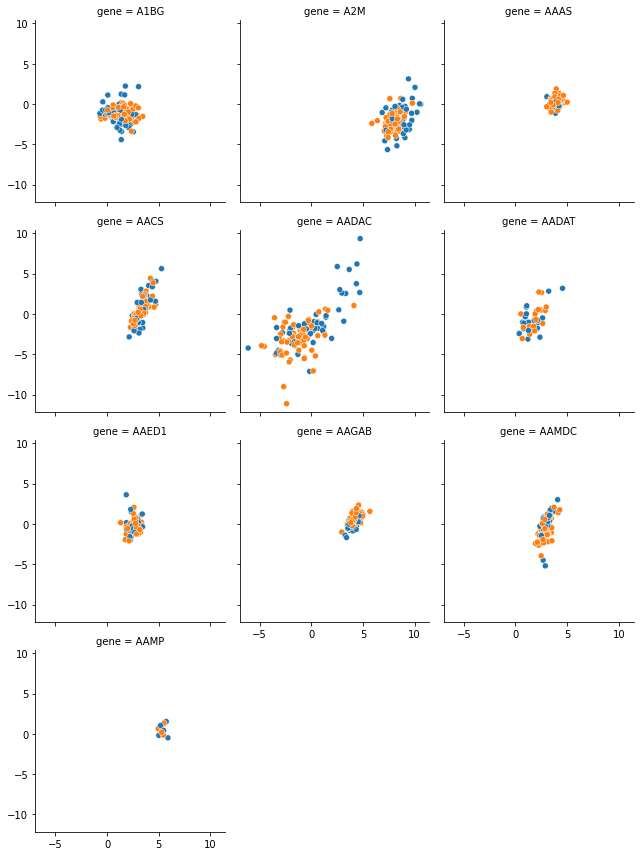

In [203]:
g = sns.FacetGrid(data = omics_df[0:1000], col = 'gene', col_wrap=3)
g.map_dataframe(sns.scatterplot, x = 'transcriptomics', y = 'proteiomics', hue = 'mutation_status')

In [202]:
# to do: calculate correlation values for each gene and visualize change in correlation

,patient_ID,gene,transcriptomics,proteiomics,mutation_status
0,C3L-00001,A1BG,2.2545,-2.5347,False
1,C3L-00009,A1BG,1.4770,-0.5627,True
2,C3L-00080,A1BG,1.5103,-1.9422,True
3,C3L-00083,A1BG,3.0398,2.1636,False
4,C3L-00093,A1BG,1.7528,-1.0022,True
...,...,...,...,...,...
995,C3L-00094,AAMP,5.4620,0.4359,False
996,C3L-00095,AAMP,5.2810,0.1972,True
997,C3L-00140,AAMP,5.7252,1.5215,False
998,C3L-00144,AAMP,5.5127,1.3285,True
